In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read csv
df_main = pd.read_csv('clean_df_main.csv')
df_main = df_main.drop(columns=['Timestamp'])
df_main.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Yes
1,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Yes
2,Female,Poland,Corporate,No,-1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Not sure
3,Female,Australia,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Not sure
4,Female,United States,Corporate,No,-1,No,1-14 days,1,-1,Yes,0,-1,1,1,No,No


In [3]:
df_main.head()
df_main.columns = df_main.columns.str.lower()
df_main.head()

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options
0,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Yes
1,Female,United States,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Yes
2,Female,Poland,Corporate,No,-1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,Maybe,Not sure
3,Female,Australia,Corporate,No,1,Yes,1-14 days,1,-1,Yes,0,-1,1,1,No,Not sure
4,Female,United States,Corporate,No,-1,No,1-14 days,1,-1,Yes,0,-1,1,1,No,No


In [10]:
#value counts names in column Days_Indoors
df_main['days_Indoors'].value_counts()

frequency_distribution = df_main['days_Indoors'].value_counts().reset_index()
frequency_distribution.columns = ['days_Indoors', 'family_history']

print(frequency_distribution)


         Days_Indoors  family_history
0           1-14 days           62429
1          31-60 days           59625
2    Go out Every day           57323
3  More than 2 months           54918
4          15-30 days           52867


In [5]:
# Clean the 'gender' column
df_main['gender'] = df_main['gender'].str.strip().str.lower()

# Check unique values after cleaning
print("\nUnique values in 'gender' column after cleaning:")
print(df_main['gender'].unique())


# Convert 'Gender' to numeric for correlation purposes
df_main['gender'] = df_main['gender'].map({'male': 1, 'female': 0})



Unique values in 'gender' column after cleaning:
['female' 'male']



Correlation Matrix:
                    gender  family_history  growing_stress  changes_habits  \
gender            1.000000       -0.196748       -0.042058        0.012399   
family_history   -0.196748        1.000000        0.008275       -0.002440   
growing_stress   -0.042058        0.008275        1.000000       -0.015671   
changes_habits    0.012399       -0.002440       -0.015671        1.000000   
mood_swings      -0.019181        0.003774       -0.006811       -0.022872   
coping_struggles -0.056194        0.011056       -0.018749       -0.028302   
work_interest     0.017939       -0.003530       -0.042259       -0.029952   
social_weakness   0.004620       -0.000909        0.033674       -0.003001   

                  mood_swings  coping_struggles  work_interest  \
gender              -0.019181         -0.056194       0.017939   
family_history       0.003774          0.011056      -0.003530   
growing_stress      -0.006811         -0.018749      -0.042259   
changes_habi

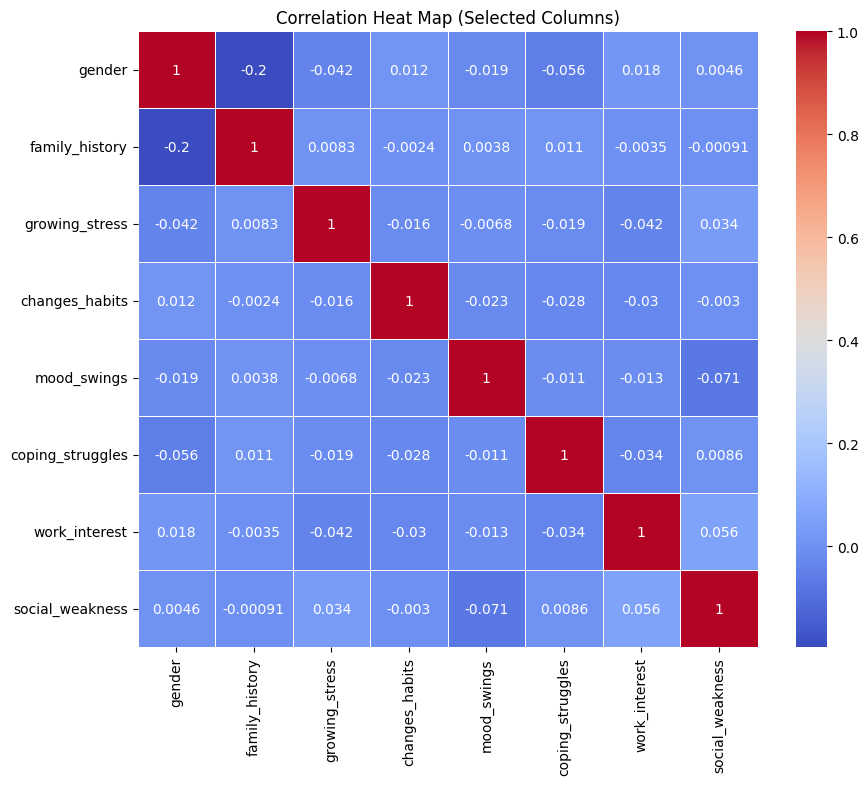

In [7]:
#define data set for correlation without any strings
df_cor = df_main.drop(columns=['occupation','country', 'treatment', 'self_employed', 'days_indoors', 'care_options',
                               'mental_health_interview', 'mental_health_history'])

df_cor.head()


# Calculate the correlation matrix
correlation_matrix = df_cor.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map (Selected Columns)')
plt.show()

In [12]:

print(correlation_matrix['family_history'])

gender             -0.196748
family_history      1.000000
growing_stress      0.008275
changes_habits     -0.002440
mood_swings         0.003774
coping_struggles    0.011056
work_interest      -0.003530
social_weakness    -0.000909
Name: family_history, dtype: float64


In [19]:
#define a feature of mental_health
df_mh_factors = df_main.copy()
df_mh_factors['mental_health_factor'] = df_main['growing_stress'] + df_main['mood_swings'] + df_main['coping_struggles']
df_mh_factors.tail()

#mental health severity : Growing_Stress Changes_Habits Mental_Health_History Mood_Swings Coping_Struggles Work_Interest Social_Weakness

#MH issues for a candidacy rating : family_history treatment Days_Indoors Growing_Stress Changes_Habits Mental_Health_History

#intensity factors
df_mh_factors['factor_severity'] = df_main['family_history'] + df_main['mental_health_history'] + df_main['social_weakness'] + df_main['coping_struggles']


+ #df_main['days']

,gender,country,occupation,self_employed,family_history,treatment,days_indoors,growing_stress,changes_habits,mental_health_history,mood_swings,coping_struggles,work_interest,social_weakness,mental_health_interview,care_options,mental_health_factor
287157,1,United States,Business,Yes,1,Yes,15-30 days,-1,0,No,-1,1,1,0,Maybe,Not sure,-1
287158,1,South Africa,Business,No,1,Yes,15-30 days,-1,0,No,-1,1,1,0,No,Yes,-1
287159,1,United States,Business,No,1,No,15-30 days,-1,0,No,-1,1,1,0,No,No,-1
287160,1,United States,Business,No,1,Yes,15-30 days,-1,0,No,-1,1,1,0,No,Yes,-1
287161,1,United States,Business,No,1,Yes,15-30 days,-1,0,No,-1,1,1,0,No,Yes,-1


[ 1  0 -1]


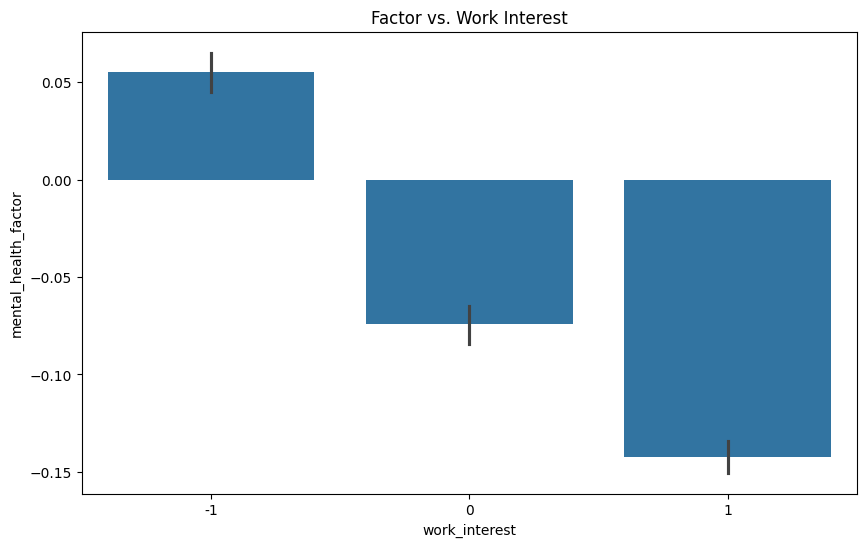

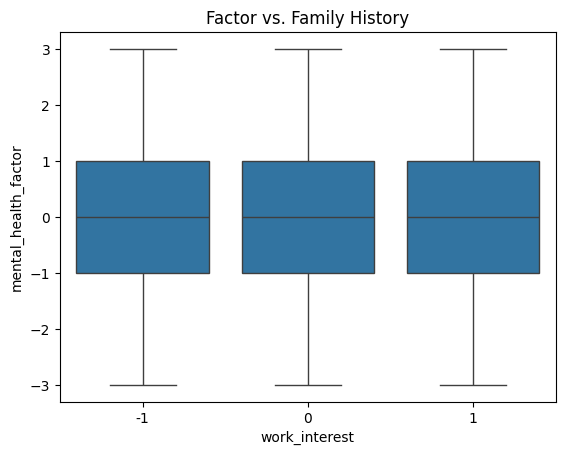

In [30]:

#mental health unique
df_mh_factor['mental_health_factor'].unique()
print(df_mh_factor['work_interest'].unique())


#bar plot for mental_health_factor
plt.figure(figsize=(10, 6))
sns.barplot(x='work_interest', y='mental_health_factor', data=df_mh_factor)
plt.title('Factor vs. Work Interest')
plt.show()


# Example: Box plot for 'growing_stress' based on 'family_history'
sns.boxplot(x='work_interest', y='mental_health_factor', data=df_main)
plt.title('Factor vs. Family History')
plt.show()

In [11]:
# # Specify the columns you want to include in the correlation matrix
# columns_of_interest = ['coping_struggles', 'work_interest', 'family_history', 'growing_stress']

# # Create a correlation matrix with the specified columns
# correlation_matrix = df_main[columns_of_interest].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heat Map (Selected Columns)')
# plt.show()

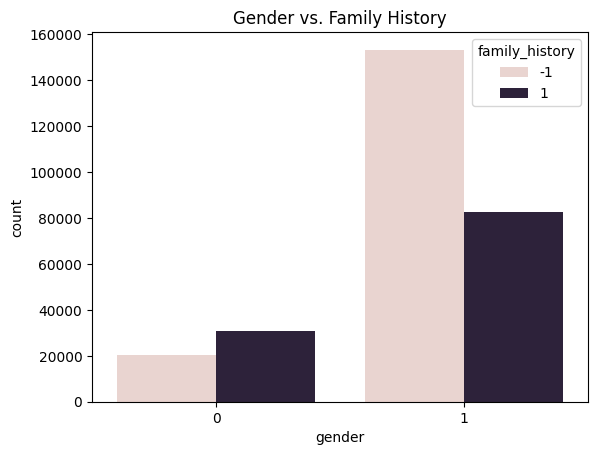

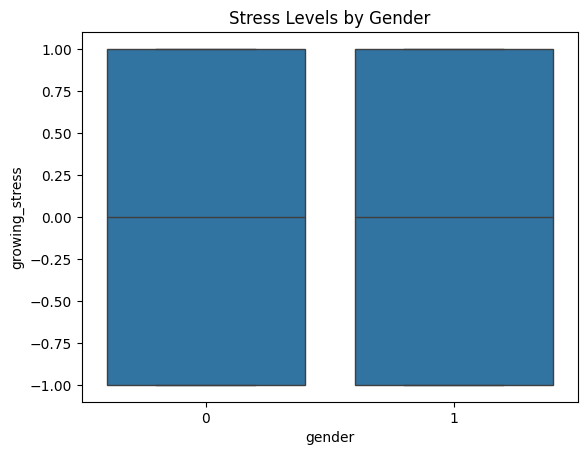

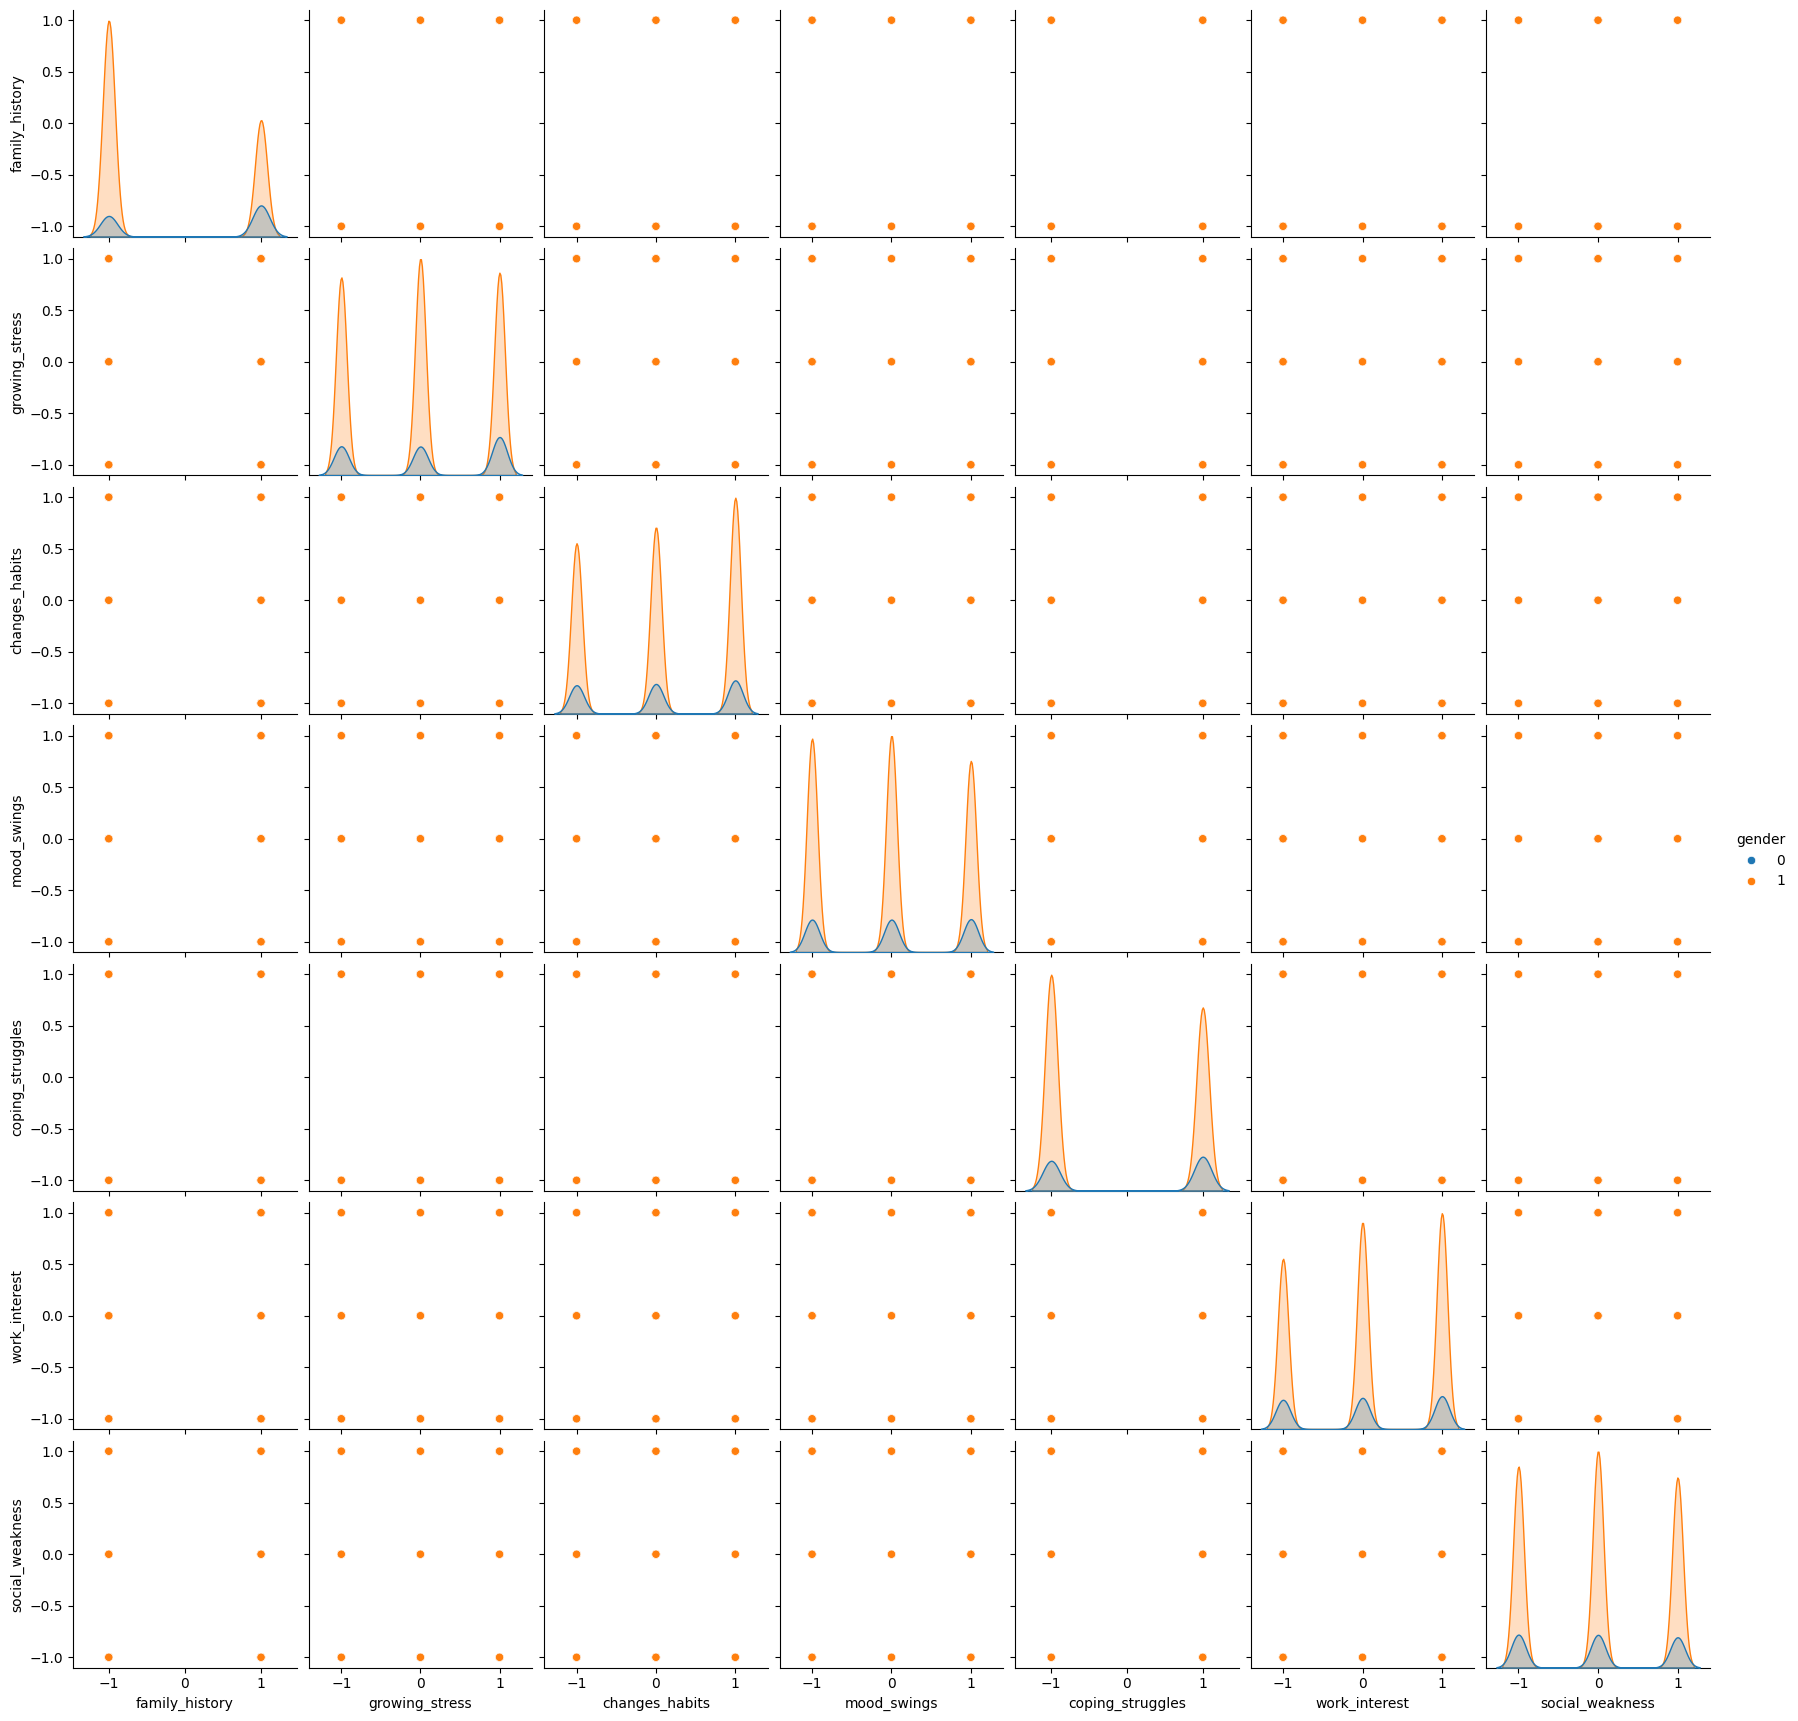

In [31]:
# Bar plot of gender vs. family history
sns.countplot(x='gender', hue='family_history', data=df_cor)
plt.title('Gender vs. Family History')
plt.show()

# Box plot of stress levels by gender
sns.boxplot(x='gender', y='growing_stress', data=df_cor)
plt.title('Stress Levels by Gender')
plt.show()

# Pair plot
sns.pairplot(df_cor, hue='gender')
plt.show()